In [126]:
import tensorflow.compat.v1 as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

tf.compat.v1.disable_eager_execution()
tf.disable_v2_behavior()

In [127]:
def normalize(dataset):
    dataset = dataset.apply(lambda x: (x - x.min(axis = 0)) / (x.max(axis = 0) - x.min(axis = 0)))
    dataset = dataset.loc[:,dataset.any()]
    return dataset

In [128]:
dataset = pd.read_csv("cleanningdata.csv" , index_col = 0)
dataset = normalize(dataset.iloc[:,:])
# Splitting the dataset into train 70% and test 30%
features = (dataset.shape[1] - 1)
examples = dataset.shape[0]
train_size = int (0.7 * len(dataset))
(x_train , y_train) = (np.array(dataset.iloc[:train_size,:features]), np.array(dataset.iloc[:train_size,features:]))
(x_test , y_test) = (np.array(dataset.iloc[train_size:,:features]), np.array(dataset.iloc[train_size:,features:]))

In [131]:
# hyper parameters 
learning_rate = 0.01
epochs = 10000
batch_size = 100
batches = int (train_size / batch_size)

In [132]:
x = tf.placeholder(tf.float32 , [None , features])
y = tf.placeholder(tf.float32 , [None , 1])

W = tf.Variable(tf.zeros([features, 1]))
b = tf.Variable(tf.zeros([1]))

pred = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = y, logits = pred))
update = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
# Define accuracy - Percentage of predictions did we get right
predicted_class = tf.greater(pred,0.5)
correct = tf.equal(predicted_class, tf.equal(y,1.0))
accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))

session = tf.Session()
session.run(tf.global_variables_initializer())

loss_trace = []
train_acc = []
test_acc = []

for epoch in range(epochs):     
    for row in range(batches):        
        batch_x = x_train [row * batch_size : (row + 1) * batch_size]
        batch_y = y_train [row * batch_size : (row + 1) * batch_size]
        session.run(update ,feed_dict = {x : batch_x , y : batch_y})
        temp_loss , temp_train_acc = session.run ([loss , accuracy] , feed_dict = {x : batch_x , y : batch_y})
        temp_test_acc = session.run(accuracy, feed_dict = {x: x_test, y: y_test})
    
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    
    if(epoch % 1000 == 0):    
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch, temp_loss,temp_train_acc, temp_test_acc))

epoch:    0 loss: 0.692110 train_acc: 0.470000 test_acc: 0.518887
epoch: 1000 loss: 0.568127 train_acc: 0.630000 test_acc: 0.598410
epoch: 2000 loss: 0.517837 train_acc: 0.680000 test_acc: 0.642810
epoch: 3000 loss: 0.483332 train_acc: 0.720000 test_acc: 0.667329
epoch: 4000 loss: 0.457550 train_acc: 0.720000 test_acc: 0.687210
epoch: 5000 loss: 0.437206 train_acc: 0.770000 test_acc: 0.699139
epoch: 6000 loss: 0.420546 train_acc: 0.790000 test_acc: 0.705765
epoch: 7000 loss: 0.406534 train_acc: 0.810000 test_acc: 0.712392
epoch: 8000 loss: 0.394507 train_acc: 0.820000 test_acc: 0.718357
epoch: 9000 loss: 0.384014 train_acc: 0.830000 test_acc: 0.722333


### **Loss Function**
    The behavior of the loss function following the execution of the Gradient Descent algorithm:

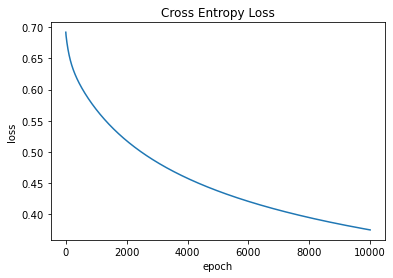

In [133]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

### **Accuracy measure :** 
    calculate the number of classifications a model correctly predicts divided by the total number of predictions made.

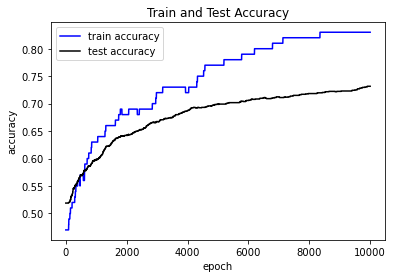

In [136]:
plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()

In [153]:
def logistic_fun(z):
    return 1/(1.0 + np.exp(-z))

x1 = dataset.iloc[2:3,:-1]
x2 = dataset.iloc[0:1,:-1]
print("A Flight which will be land on time :", logistic_fun(np.matmul(np.array(x1),session.run(W)) + session.run(b))[0][0])
print("A Flight which will be delayed :", logistic_fun(np.matmul(np.array(x2),session.run(W)) + session.run(b))[0][0])
dataset.head(4)

A Flight which will be land on time : 0.1826466329913122
A Flight which will be delayed : 0.5430764593118876


,MONTH,DAY,CRS_DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,CRS_ELAPSED_TIME,...,DEST_TXK,DEST_TYR,DEST_TYS,DEST_USA,DEST_VEL,DEST_VPS,DEST_WRG,DEST_XNA,DEST_YAK,ARR_DELAY
4238244,0.636364,0.066667,0.265071,0.064948,0.063380,0.309160,0.777354,0.032258,0.762834,0.785029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2091919,0.000000,0.266667,0.688328,0.049485,0.070423,0.723070,0.735793,0.064516,0.734832,0.178503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710706,0.272727,0.933333,0.611372,0.019588,0.056338,0.616624,0.680662,0.032258,0.687739,0.119002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3003291,0.545455,0.566667,0.563916,0.025773,0.084507,0.573791,0.649279,0.043011,0.644888,0.138196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
